In [56]:
"""
import zipfile
import io
zip_file='data.zip'
with zipfile.ZipFile(zip_file,'r') as zip_ref:
  zip_ref.extractall()
  """


"\nimport zipfile\nimport io\nzip_file='data.zip'\nwith zipfile.ZipFile(zip_file,'r') as zip_ref:\n  zip_ref.extractall()\n  "

In [57]:
"""
import shutil

# Specify the path to the folder you want to delete
folder_path = '/content/data'

# Use shutil.rmtree to delete the folder and its contents
shutil.rmtree(folder_path)
"""


"\nimport shutil\n\n# Specify the path to the folder you want to delete\nfolder_path = '/content/data'\n\n# Use shutil.rmtree to delete the folder and its contents\nshutil.rmtree(folder_path)\n"

In [58]:
import tensorflow as tf

In [59]:
import os

In [60]:
import cv2
import imghdr

In [69]:
import os
from PIL import Image

# Define the path to the directory containing the dataset
dataset_dir = "/content/data/happy"

# Define the desired output format ("jpeg" or "png")
output_format = "png"

# List all the image files in the dataset directory
image_files = [file for file in os.listdir(dataset_dir) if file.lower().endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp"))]

# Create a new directory to store the converted images
output_dir = "/content/dataoldnew/happy"
os.makedirs(output_dir, exist_ok=True)

# Iterate over the image files
for image_file in image_files:
    # Load the image
    image_path = os.path.join(dataset_dir, image_file)
    image = Image.open(image_path)
    
    # Convert the image to the desired format
    output_file = os.path.splitext(image_file)[0] + "." + output_format
    output_path = os.path.join(output_dir, output_file)
    image.save(output_path, output_format.upper())

print("Image conversion completed.")


Image conversion completed.


In [70]:
data_dir='dataoldnew'

In [71]:
img_exts=['jpeg','jpg','bmp','png']

In [72]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)/

Issue with image dataoldnew/happy/Smiling-Faces-780x470.png
Issue with image dataoldnew/happy/image2.png
Issue with image dataoldnew/happy/images6.png
Issue with image dataoldnew/happy/images20.png
Issue with image dataoldnew/happy/image29.png
Issue with image dataoldnew/happy/id-19-mask-smiley-emoji-happy-emotion-happiness-expression-cartoon-thumbnail.png
Issue with image dataoldnew/happy/smiling-faces-happy-group-people-260nw-482700100.png
Issue with image dataoldnew/happy/happy-people-faces-collage-collection-260nw-1780559750.png
Issue with image dataoldnew/happy/images13.png
Issue with image dataoldnew/happy/images15.png
Issue with image dataoldnew/happy/Happy-Face-4e0f88e7e2275_hires.png
Issue with image dataoldnew/happy/images10.png
Issue with image dataoldnew/happy/images4.png
Issue with image dataoldnew/happy/images22.png
Issue with image dataoldnew/happy/istock_000023516050large_wide-386fa55dd49e25aa2be9d7fad5d5029d89984c83-s1100-c50.png
Issue with image dataoldnew/happy/happy

In [73]:
import numpy as np
from matplotlib import pyplot as plt

In [77]:
data=tf.keras.utils.image_dataset_from_directory('dataoldnew')

Found 200 files belonging to 2 classes.


In [78]:
data_iterator = data.as_numpy_iterator()

In [79]:
batch = data_iterator.next()

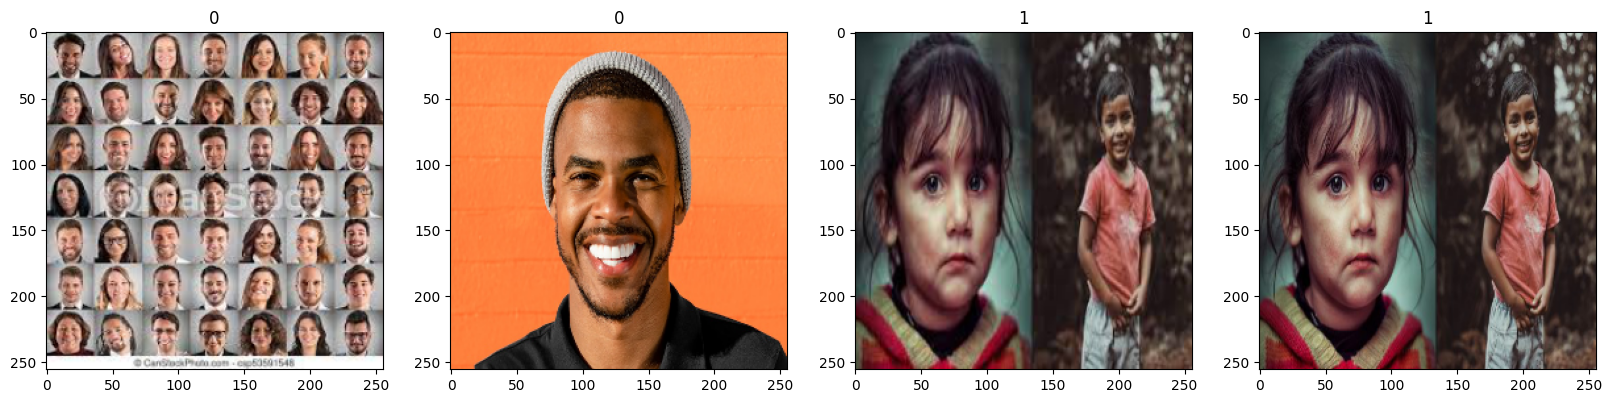

In [80]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    #happy=0, sad=1

In [81]:
data = data.map(lambda x,y: (x/255, y))

In [82]:
data.as_numpy_iterator().next()

(array([[[[3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          ...,
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03]],
 
         [[3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          ...,
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03]],
 
         [[3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          ...,
          [3.92156886e-03, 3.92156886e-03, 3.9215

In [83]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [84]:
train_size

4

In [85]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [87]:
model = Sequential()

In [88]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [89]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [91]:
logdir='logs'

In [92]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [93]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
4/4 [==============================] - 28s 5s/step - loss: 1.7091 - accuracy: 0.5391 - val_loss: 1.0597 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 21s 4s/step - loss: 0.8663 - accuracy: 0.4297 - val_loss: 0.6500 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 24s 6s/step - loss: 0.6898 - accuracy: 0.4688 - val_loss: 0.6230 - val_accuracy: 0.7812
Epoch 4/20
4/4 [==============================] - 31s 7s/step - loss: 0.6518 - accuracy: 0.6484 - val_loss: 0.5982 - val_accuracy: 0.9688
Epoch 5/20
4/4 [==============================] - 26s 6s/step - loss: 0.6138 - accuracy: 0.7266 - val_loss: 0.4969 - val_accuracy: 0.9062
Epoch 6/20
4/4 [==============================] - 31s 7s/step - loss: 0.5204 - accuracy: 0.8125 - val_loss: 0.4488 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 25s 5s/step - loss: 0.5205 - accuracy: 0.7266 - val_loss: 0.4502 - val_accuracy: 0.8125
Epoch 8/20
4/4 [==================

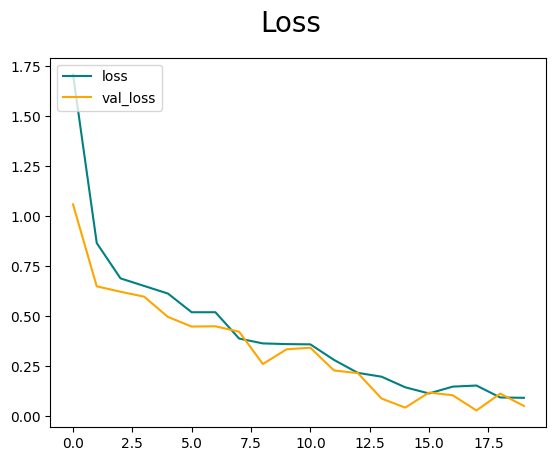

In [94]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

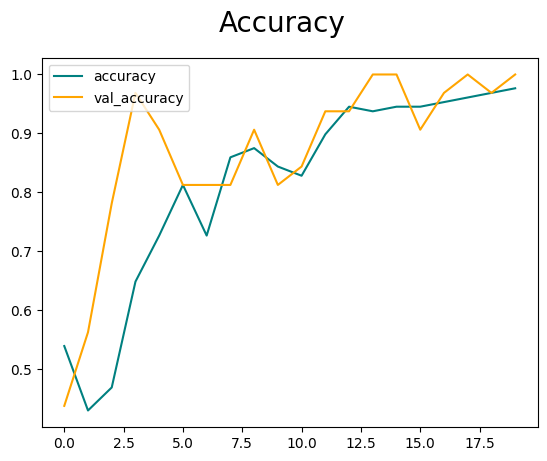

In [95]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [96]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [97]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [98]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [99]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [100]:
import cv2

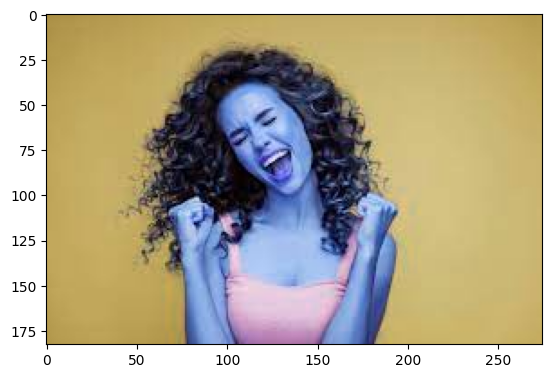

In [101]:
img = cv2.imread('/content/download.png')
plt.imshow(img)
plt.show()

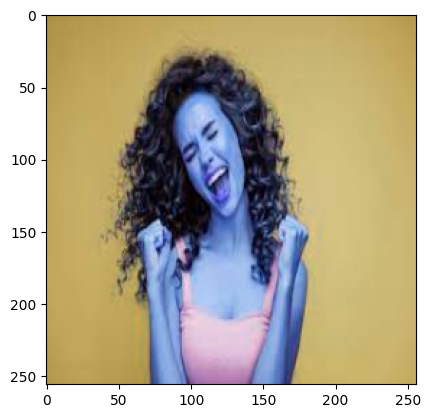

In [102]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [103]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 220ms/step


In [104]:
yhat

array([[0.04027394]], dtype=float32)

In [105]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [106]:
from tensorflow.keras.models import load_model

In [107]:
model.save(os.path.join('models','imageclassifier.h5'))

In [110]:
new_model = load_model('/content/models/imageclassifier.h5')

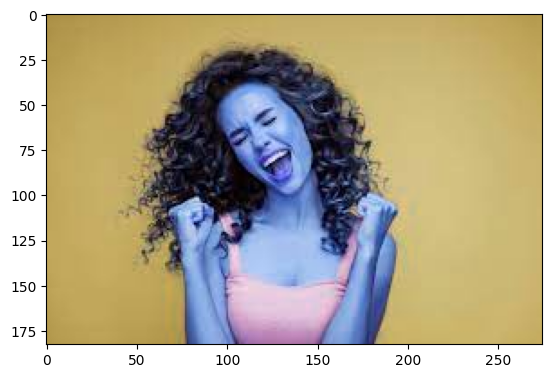

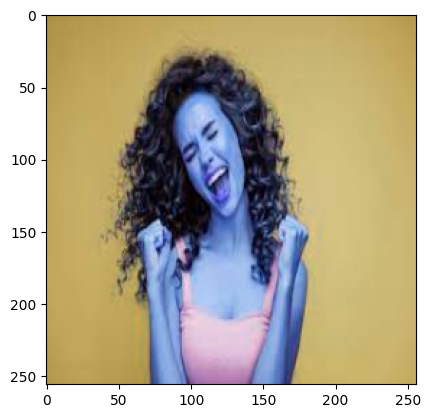

1/1 [==============================] - 0s 47ms/step
Predicted class is Happy


In [115]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('/content/download.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')




